In [1]:
# Indicate whether a Nvidia graphics card is available and 
# the cudatoolkit package installed:
gpu_installed = True

# Indicate whether to execute all of the code, otherwise parts 
# of the code that take an excessive amount of time to execute
# will be skipped:
complete_version = True

In [2]:
import birdepy as bd
if gpu_installed:
    import birdepy.gpu_functions as bdg
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pandas as pd

In [3]:
### SIMULATION EXPERIMENT ###
gamma = 0.75
nu = 0.25
alpha = 0.01
c = 1
param=[gamma, nu, alpha, c]
times = np.arange(0,101,1)
model = 'Hassell'
z0 = 10
K = 10**3

p_data_exact = bd.simulate.discrete(param, model, z0, times, k=K, seed=2021)
p_data_ea = bd.simulate.discrete(param, model, z0, times, k=K, method='ea', seed=2021)
p_data_ma = bd.simulate.discrete(param, model, z0, times, k=K, method='ma', seed=2021)
p_data_gwa = bd.simulate.discrete(param, model, z0, times, k=K, method='gwa', seed=2021)
if gpu_installed:
    p_data_gpu = bdg.discrete(param, model, z0, times[-1], k=K, seed=2021)

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numba\cuda\dispatcher.py:538: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numba\cuda\cudadrv\devicearray.py:886: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Text(0.5, 1.0, 'exact')

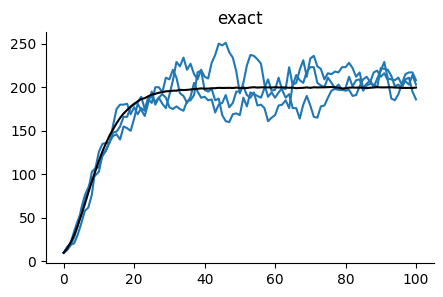

In [4]:
fig, axs = plt.subplots(1,1, figsize=(5,3))
axs.plot(times, p_data_exact[0:3, :].T, color='tab:blue')
axs.plot(times, np.mean(p_data_exact, axis=0), color='k')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.set_title('exact')

Text(0.5, 1.0, 'ea')

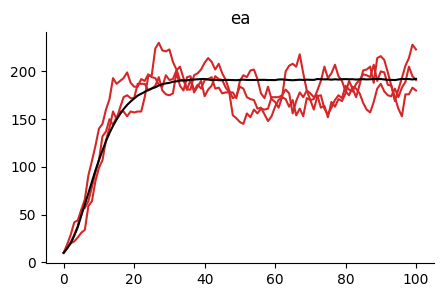

In [5]:
fig, axs = plt.subplots(1,1, figsize=(5,3))
axs.plot(times, p_data_ea[0:3, :].T, color='tab:red')
axs.plot(times, np.mean(p_data_ea, axis=0), color='k')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.set_title('ea')

Text(0.5, 1.0, 'ma')

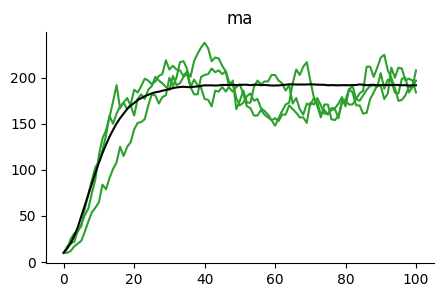

In [6]:
fig, axs = plt.subplots(1,1, figsize=(5,3))
axs.plot(times, p_data_ma[0:3, :].T, color='tab:green')
axs.plot(times, np.mean(p_data_ma, axis=0), color='k')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.set_title('ma')

Text(0.5, 1.0, 'gwa')

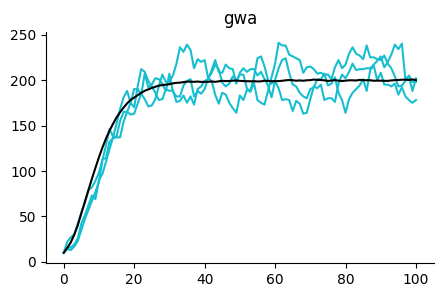

In [7]:
fig, axs = plt.subplots(1,1, figsize=(5,3))
axs.plot(times, p_data_gwa[0:3, :].T, color='tab:cyan')
axs.plot(times, np.mean(p_data_gwa, axis=0), color='k')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.set_title('gwa')

In [8]:
times = [0, times[-1]]

tic = time.time()
p_data_exact = bd.simulate.discrete(param, model, z0, times, k=K, seed=2021)
toc_exact = time.time()-tic

tic = time.time()
p_data_ea = bd.simulate.discrete(param, model, z0, times, k=K, method='ea', seed=2021)
toc_ea = time.time()-tic

tic = time.time()
p_data_ma = bd.simulate.discrete(param, model, z0, times, k=K, method='ma', seed=2021)
toc_ma = time.time()-tic

tic = time.time()
p_data_gwa = bd.simulate.discrete(param, model, z0, times, k=K, method='gwa', seed=2021)
toc_gwa = time.time()-tic

if gpu_installed:
    tic = time.time()
    p_data_gpu = bdg.discrete(param, model, z0, times[-1], k=K, seed=2021)
    toc_gpu = time.time()-tic

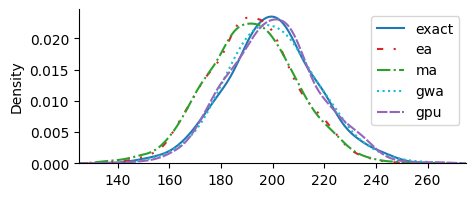

In [9]:
fig, ax = plt.subplots(figsize=(5,2))
sns.kdeplot(p_data_exact[:, -1], color='tab:blue', label='exact')
sns.kdeplot(p_data_ea[:, -1], color='tab:red', label='ea', linestyle=(0, (3, 5, 1, 5, 1, 5)))
sns.kdeplot(p_data_ma[:, -1], color='tab:green', label='ma',  linestyle='-.')
sns.kdeplot(p_data_gwa[:, -1], color='tab:cyan', label='gwa',linestyle=':')
if gpu_installed:
    sns.kdeplot(p_data_gpu, color='tab:purple', label='gpu', linestyle=(0, (5,1)))
plt.legend(loc='upper right')
plt.xlim([125, 275])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [12]:
print("Table: Simulation CPU times")

if gpu_installed:
    print(pd.DataFrame(
              [[toc_exact, toc_ea, toc_ma, toc_gwa, toc_gpu]],
             columns=["exact", "ea", "ma", "gwa", "gpu"]))
else:
    print(pd.DataFrame(
              [[toc_exact, toc_ea, toc_ma, toc_gwa]],
             columns=["exact", "ea", "ma", "gwa"]))

Table: Simulation CPU times
        exact         ea         ma        gwa    gpu
0  184.766001  13.085998  19.985622  31.476001  0.134


In [13]:
### CONTINUOUS SIMULATION EXPERIMENT ###
gamma = 0.5
nu = 0.45

times = np.arange(0,3,0.1)

dsc_sample_path = bd.simulate.discrete([gamma, nu], 'linear', 10, times, seed=2021)
cts_times, cts_sample_path = bd.simulate.continuous([gamma, nu], 'linear', 10, 3, seed=2021)

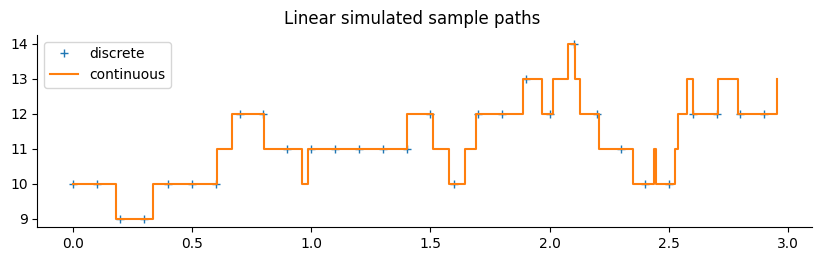

In [14]:
fig, ax = plt.subplots(1,1, sharex=True, sharey=True, figsize=(10,2.5))
fig.suptitle("Linear simulated sample paths")

ax.plot(times, dsc_sample_path, '+', label='discrete')
ax.step(cts_times, cts_sample_path, label='continuous', where='post')
ax.legend(loc='upper left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [15]:
### VERHULST MODEL PROBABILITY EXPERIMENT 1 ###
alpha = 0.025
beta = 0
gamma = 0.8
nu = 0.4
param = [gamma, nu, alpha, beta]
t = 1
zz =  np.arange(0, 40, 1)
model = 'Verhulst'
z0 = 15

In [16]:
fig.suptitle("Small population Verhulst density approximations")

tic = time.time()
if gpu_installed:
    pp_sim = bdg.probability(z0, zz, t, param, model=model, k=10**6, seed=2021)
else:
    pp_sim = bd.probability(z0, zz, [t], param, model=model, method='sim', k=10**4, seed=2021)
toc_sim = time.time() - tic

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numba\cuda\cudadrv\devicearray.py:886: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


In [17]:
tic = time.time()
pp_expm = bd.probability(z0, zz, t, param, model=model, method='expm')
toc_expm = time.time() - tic

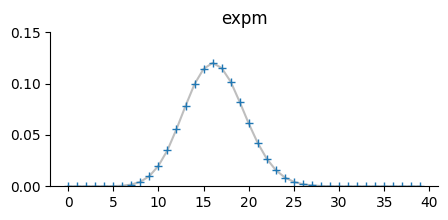

In [18]:
fig, axs = plt.subplots(figsize=(5,2))
axs.plot(zz, pp_sim[0], 'tab:gray',alpha=0.5)
axs.plot(zz, pp_expm[0], '+')
axs.plot(zz, np.where((pp_expm[0]>=0)*(pp_expm[0]<=1), 1, 0.01), 'rx')
axs.set_ylim([0,0.15])
axs.set_title('expm')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

In [19]:
tic = time.time()
pp_uni = bd.probability(z0, zz, t, param, model=model, method='uniform', k=10**4)
toc_uni = time.time() - tic

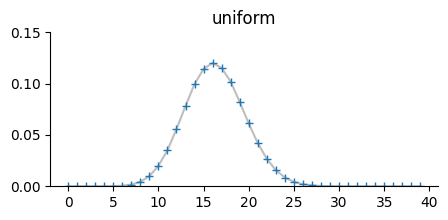

In [20]:
fig, axs = plt.subplots(figsize=(5,2))
axs.plot(zz, pp_sim[0], 'tab:gray',alpha=0.5)
axs.plot(zz, pp_uni[0], '+')
axs.plot(zz, np.where((pp_uni[0]>=0)*(pp_uni[0]<=1), 1, 0.01), 'rx')
axs.set_ylim([0,0.15])
axs.set_title('uniform')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

In [21]:
tic = time.time()
pp_erl = bd.probability(z0, zz, t, param, model=model, method='Erlang', k=10**3)
toc_erl = time.time() - tic

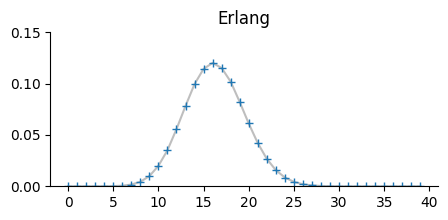

In [22]:
fig, axs = plt.subplots(figsize=(5,2))
axs.plot(zz, pp_sim[0], 'tab:gray',alpha=0.5)
axs.plot(zz, pp_erl[0], '+')
axs.plot(zz, np.where((pp_erl[0]>=0)*(pp_erl[0]<=1), 1, 0.01), 'rx')
axs.set_ylim([0,0.15])
axs.set_title('Erlang')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

In [23]:
tic = time.time()
pp_ilt = bd.probability(z0, zz, t, param, model=model, method='ilt')
toc_ilt = time.time() - tic

In [24]:
model

'Verhulst'

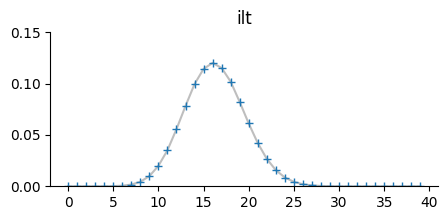

In [25]:
fig, axs = plt.subplots(figsize=(5,2))
axs.plot(zz, pp_sim[0], 'tab:gray',alpha=0.5)
axs.plot(zz, pp_ilt[0], '+')
axs.plot(zz, np.where((pp_ilt[0]>=0)*(pp_ilt[0]<=1), 1, 0.01), 'rx')
axs.set_ylim([0,0.15])
axs.set_title('ilt')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

In [26]:
tic = time.time()
pp_da = bd.probability(z0, zz, t, param, model=model, method='da')
toc_da = time.time() - tic

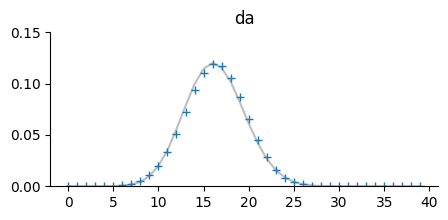

In [27]:
fig, axs = plt.subplots(figsize=(5,2))
axs.plot(zz, pp_sim[0], 'tab:gray',alpha=0.5)
axs.plot(zz, pp_da[0], '+')
axs.plot(zz, np.where((pp_da[0]>=0)*(pp_da[0]<=1), 1, 0.01), 'rx')
axs.set_ylim([0,0.15])
axs.set_title('da')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

In [28]:
tic = time.time()
pp_oua = bd.probability(z0, zz, t, param, model=model, method='oua')
toc_oua = time.time() - tic

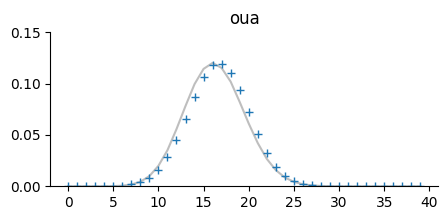

In [29]:
fig, axs = plt.subplots(figsize=(5,2))
axs.plot(zz, pp_sim[0], 'tab:gray',alpha=0.5)
axs.plot(zz, pp_oua[0], '+')
axs.plot(zz, np.where((pp_oua[0]>=0)*(pp_oua[0]<=1), 1, 0.01), 'rx')
axs.set_ylim([0,0.15])
axs.set_title('oua')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

In [30]:
tic = time.time()
pp_gwa = bd.probability(z0, zz, t, param, model=model, method='gwa')
toc_gwa = time.time() - tic

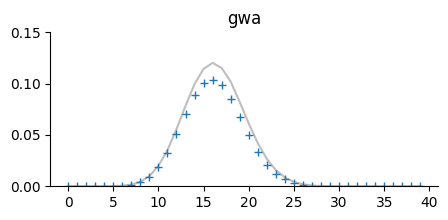

In [31]:
fig, axs = plt.subplots(figsize=(5,2))
axs.plot(zz, pp_sim[0], 'tab:gray',alpha=0.5)
axs.plot(zz, pp_gwa[0], '+')
axs.plot(zz, np.where((pp_gwa[0]>=0)*(pp_gwa[0]<=1), 1, 0.01), 'rx')
axs.set_ylim([0,0.15])
axs.set_title('gwa')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

In [32]:
tic = time.time()
pp_gwasa = bd.probability(z0, zz, t, param, model=model, method='gwasa')
toc_gwasa = time.time() - tic

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\birdepy\probability_gwasa.py:338: RuntimeWarning: Probability not in [0, 1] computed, some output has been replaced by a default value.  Results may be unreliable.
  warnings.warn("Probability not in [0, 1] computed, "


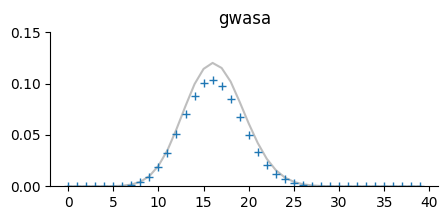

In [33]:
fig, axs = plt.subplots(figsize=(5,2))
axs.plot(zz, pp_sim[0], 'tab:gray',alpha=0.5)
axs.plot(zz, pp_gwasa[0], '+')
axs.plot(zz, np.where((pp_gwasa[0]>=0)*(pp_gwasa[0]<=1), 1, 0.14), 'rx')
axs.set_ylim([0,0.15])
axs.set_title('gwasa')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

In [35]:
print("Table: Small population Verhulst CPU times")

print(pd.DataFrame(
    [[toc_sim, toc_expm, toc_uni, toc_erl, toc_ilt, toc_da, toc_oua, toc_gwa, toc_gwasa]],
    columns=["sim", "expm", "uniform", "Erlang", "ilt", "da", "oua", "gwa", "gwasa"]))

Table: Small population Verhulst CPU times
        sim   expm    uniform    Erlang    ilt     da       oua       gwa  \
0  1.198997  0.446  25.838001  1.486001  4.442  0.011  0.006998  0.072999   

   gwasa  
0  0.017  


In [36]:
### ESTIMATION EXPERIMENT 1 SETUP ###
gamma = 0.8
nu = 0.4
alpha = 0.025
beta = 0
param = [gamma, nu, alpha, beta]
num_sample_paths = 5

In [37]:
obs_times = list(range(100))
p_data = bd.simulate.discrete(param, 'Verhulst', 5, obs_times, seed=2021, k=num_sample_paths)
t_data = [obs_times for _ in range(num_sample_paths)]

In [38]:
con = {'type': 'ineq', 'fun': lambda p: p[0]-p[1]}
alpha_max = 1/np.amax(np.array(p_data))
alpha_mid = 0.5*alpha_max

In [39]:
### ABC ESTIMATION EXPERIMENT ###
est = bd.estimate(t_data, p_data, [0.5], [[0,1]], framework='abc', model='Verhulst',
                  known_p=[nu, alpha, beta], idx_known_p=[1, 2, 3], max_its=1,
                  seed=2021)

In [40]:
print(f'Basic ABC estimate is {est.p}, with standard error {est.se}'
      f'computed in {est.compute_time} seconds.')

Basic ABC estimate is [0.7468397861173611], with standard error [0.1033682469591971]computed in 148.23099827766418 seconds.


In [41]:
if complete_version:
    est = bd.estimate(t_data, p_data, [0.5], [[0,1]], framework='abc', model='Verhulst',
                      known_p=[nu, alpha, beta], idx_known_p=[1, 2, 3], 
                      seed=2021)

    print(f'Dynamic ABC estimate is {est.p}, with standard error {est.se}'
          f'computed in {est.compute_time} seconds.')

Dynamic ABC estimate is [0.7620827322497084], with standard error [0.05331307382209087]computed in 4169.903683185577 seconds.


In [42]:
# ### DNM ESTIMATION EXPERIMENT ###
dnm_estimates = []
dnm_se = []
dnm_times = []
if complete_version:
    for likelihood in ['da', 'Erlang', 'expm', 'gwa', 'gwasa', 'ilt', 'oua', 'uniform']:
        tic = time.time()
        est = bd.estimate(t_data, p_data, [0.51, 0.5, alpha_mid], [[1e-6,5], [1e-6,5], [1e-6, alpha_max]],
                          model='Verhulst', framework='dnm', known_p=[0], idx_known_p=[3], 
                          con=con, likelihood=likelihood, opt_method='differential-evolution')
        toc = time.time()-tic
        (est.p).insert(0, likelihood)
        (est.se).insert(0, likelihood)
        dnm_estimates.append(est.p)
        dnm_se.append(est.se)
        dnm_times.append([likelihood, toc])
else:
    for likelihood in ['da', 'Erlang', 'expm', 'gwa', 'gwasa', 'oua', 'uniform']:
        tic = time.time()
        est = bd.estimate(t_data, p_data, [0.51, 0.5, alpha_mid], [[1e-6,5], [1e-6,5], [1e-6, alpha_max]],
                          model='Verhulst', framework='dnm', known_p=[0], idx_known_p=[3], 
                          con=con, likelihood=likelihood, opt_method='differential-evolution')
        toc = time.time()-tic
        (est.p).insert(0, likelihood)
        (est.se).insert(0, likelihood)
        dnm_estimates.append(est.p)
        dnm_se.append(est.se)
        dnm_times.append([likelihood, toc])   

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\birdepy\probability_gwasa.py:338: RuntimeWarning: Probability not in [0, 1] computed, some output has been replaced by a default value.  Results may be unreliable.
  warnings.warn("Probability not in [0, 1] computed, "


In [48]:
print("Table: DNM Estimates")
print(pd.DataFrame(dnm_estimates, columns=['Method', 'gamma', 'nu', 'alpha']))
print("Table: DNM Standard Errors")
print(pd.DataFrame(dnm_se, columns=['Method', 'gamma', 'nu', 'alpha']))
print("Table: DNM Compute Times")
print(pd.DataFrame(dnm_times, columns=['Method', "Compute time (secs)"]))

Table: DNM Estimates
    method     gamma        nu     alpha
0       da  0.781727  0.390642  0.025229
1   Erlang  0.782408  0.387308  0.025028
2     expm  0.781042  0.386668  0.025025
3      gwa  0.411122  0.341390  0.007558
4    gwasa  0.420135  0.349484  0.007507
5      ilt  0.780121  0.386010  0.025038
6      oua  0.652840  0.371583  0.022918
7  uniform  0.781042  0.386668  0.025025
Table: DNM Standard Errors
    method     gamma        nu     alpha
0       da  0.061226  0.029231  0.001312
1   Erlang  0.065319  0.029365  0.001277
2     expm  0.065016  0.029215  0.001277
3      gwa  0.043218  0.022813  0.004060
4    gwasa  0.042434  0.023799  0.003896
5      ilt  0.064472  0.028887  0.001274
6      oua  0.057047  0.029838  0.001580
7  uniform  0.065016  0.029215  0.001277
Table: DNM Compute Times
    Method  Compute time (secs)
0       da           346.485999
1   Erlang            77.263000
2     expm            77.628000
3      gwa           259.697000
4    gwasa            16.8160

In [49]:
### EM ESTIMATION EXPERIMENT ###
em_estimates = []
em_se = []
em_times = []


if complete_version: 
    for technique in ['expm', 'ilt', 'num']:
        for accelerator in ['cg', 'none', 'Lange', 'qn1', 'qn2']:
            tic = time.time()
            est = bd.estimate(t_data, p_data, [0.51, 0.5, alpha_mid], [[1e-6,5], [1e-6,5], [1e-6, alpha_max]],
                              framework='em', technique=technique, accelerator=accelerator,
                              model='Verhulst', known_p=[0], idx_known_p=[3], con=con, display=False)
            toc = time.time() - tic
            (est.p).insert(0, accelerator)
            (est.p).insert(0, technique)
            (est.se).insert(0, accelerator)
            (est.se).insert(0, technique)
            em_estimates.append(est.p)
            em_se.append(est.se)
            em_times.append([technique, accelerator, toc])
else:
    for technique in ['expm', 'num']:
        for accelerator in ['cg', 'none', 'Lange', 'qn1', 'qn2']:
            tic = time.time()
            est = bd.estimate(t_data, p_data, [0.51, 0.5, alpha_mid], [[1e-6,5], [1e-6,5], [1e-6, alpha_max]],
                              framework='em', technique=technique, accelerator=accelerator,
                              model='Verhulst', known_p=[0], idx_known_p=[3], con=con, display=False)
            toc = time.time() - tic
            (est.p).insert(0, accelerator)
            (est.p).insert(0, technique)
            (est.se).insert(0, accelerator)
            (est.se).insert(0, technique)
            em_estimates.append(est.p)
            em_se.append(est.se)
            em_times.append([technique, accelerator, toc])

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\birdepy\interface_estimate.py:530: RuntimeWarning: invalid value encountered in sqrt
  se = list(np.sqrt(np.diag(cov)))


In [52]:
print("Table: EM Estimates")
print(pd.DataFrame(em_estimates, columns=['Likelihood method','EM Algorithm',  'gamma', 'nu', 'alpha']))
print("Table: EM Standard Errors")
print(pd.DataFrame(em_se, columns=['Likelihood method','EM Algorithm', 'gamma', 'nu', 'alpha']))
print("Table: EM Compute Times")
print(pd.DataFrame(em_times, columns=['Likelihood method','EM Algorithm', "Compute time (secs)"]))

Table: EM Estimates
   Likelihood method EM Algorithm     gamma        nu     alpha
0               expm           cg  0.779627  0.386503  0.024993
1               expm         none  0.817462  0.407874  0.024846
2               expm        Lange  0.803075  0.403929  0.024629
3               expm          qn1  0.781021  0.386736  0.025019
4               expm          qn2  0.753278  0.407402  0.023736
5                ilt           cg  0.781490  0.386216  0.024999
6                ilt         none  0.817150  0.407799  0.024840
7                ilt        Lange  0.823888  0.408663  0.024992
8                ilt          qn1  0.780156  0.386353  0.025015
9                ilt          qn2  0.753561  0.407334  0.023761
10               num           cg  0.862640  0.429626  0.024935
11               num         none  0.615256  0.441385  0.017250
12               num        Lange  0.782101  0.388067  0.024972
13               num          qn1  0.503340  0.503134  0.016088
14               num

In [56]:
### LSE ESTIMATION EXPERIMENT ###
lse_estimates = []
lse_se = []
lse_times = []

if complete_version: 
    for squares in ['expm', 'fm', 'gwa']:
        tic = time.time()
        est = bd.estimate(t_data, p_data, [0.51, 0.5, alpha_mid], [[1e-6,1], [1e-6,1], [1e-6, alpha_max]],
                          framework='lse', model='Verhulst', idx_known_p=[3], known_p=[0], con=con,
                          squares=squares, se_type='simulated')
        toc = time.time() - tic
        (est.p).insert(0, squares)
        (est.se).insert(0, squares)
        lse_estimates.append(est.p)
        lse_se.append(est.se)
        lse_times.append([squares, toc])
else:
    for squares in ['expm', 'gwa']:
        tic = time.time()
        est = bd.estimate(t_data, p_data, [0.51, 0.5, alpha_mid], [[1e-6,1], [1e-6,1], [1e-6, alpha_max]],
                          framework='lse', model='Verhulst', idx_known_p=[3], known_p=[0], con=con,
                          squares=squares, se_type='simulated')
        toc = time.time() - tic
        (est.p).insert(0, squares)
        (est.se).insert(0, squares)
        lse_estimates.append(est.p)
        lse_se.append(est.se)
        lse_times.append([squares, toc])

In [59]:
print("Table: LSE Estimates")
print(pd.DataFrame(lse_estimates, columns=['Method', 'gamma', 'nu', 'alpha']))
print("Table: LSE Standard Errors")
print(pd.DataFrame(lse_se, columns=['Method', 'gamma', 'nu', 'alpha']))
print("Table: LSE Compute Times")
print(pd.DataFrame(lse_times, columns=['Method', "Compute time (secs)"]))

Table: LSE Estimates
  Method     gamma        nu     alpha
0   expm  0.707760  0.298769  0.028782
1     fm  0.710897  0.295499  0.027897
2    gwa  0.679225  0.327779  0.024435
Table: LSE Standard Errors
  Method     gamma        nu     alpha
0   expm  0.029283  0.020031  0.001910
1     fm  0.036138  0.026894  0.002442
2    gwa  0.036336  0.029930  0.002253
Table: LSE Compute Times
  Method  Compute time (secs)
0   expm            20.179997
1     fm           457.660001
2    gwa            10.768025
